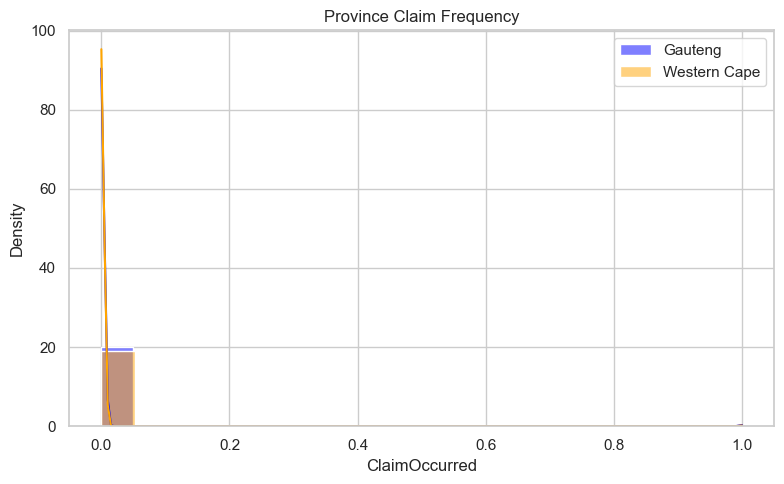

📊 Province Claim Frequency
 - Gauteng Mean: 0.00
 - Western Cape Mean: 0.00
 - p-value: 0.0000 ➜ Reject H₀
--------------------------------------------------


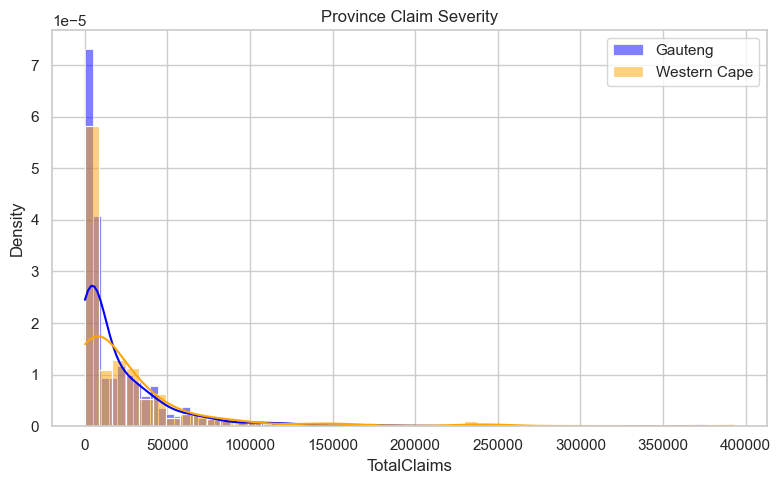

📊 Province Claim Severity
 - Gauteng Mean: 22243.88
 - Western Cape Mean: 28095.85
 - p-value: 0.0306 ➜ Reject H₀
--------------------------------------------------


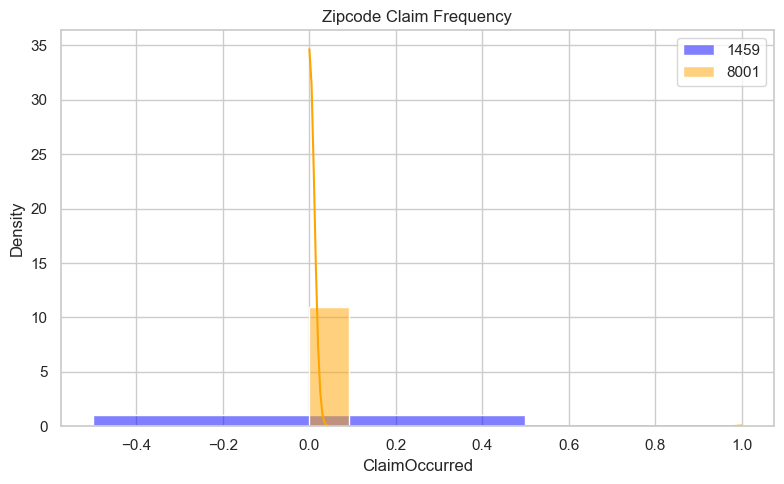

📊 Zipcode Claim Frequency
 - 1459 Mean: 0.00
 - 8001 Mean: 0.00
 - p-value: 0.3177 ➜ Fail to Reject H₀
--------------------------------------------------


/Users/jerus/Desktop/KAIM/B5W3-Insurance-Analytics/venv/lib/python3.13/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


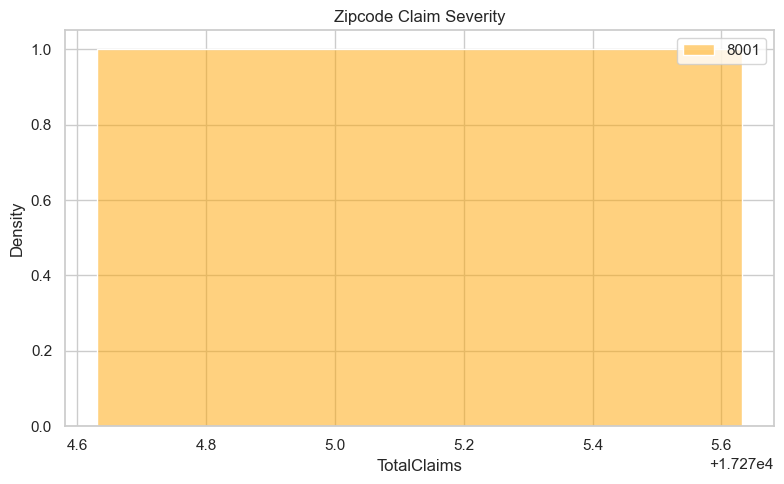

📊 Zipcode Claim Severity
 - 1459 Mean: nan
 - 8001 Mean: 17275.13
 - p-value: nan ➜ Fail to Reject H₀
--------------------------------------------------


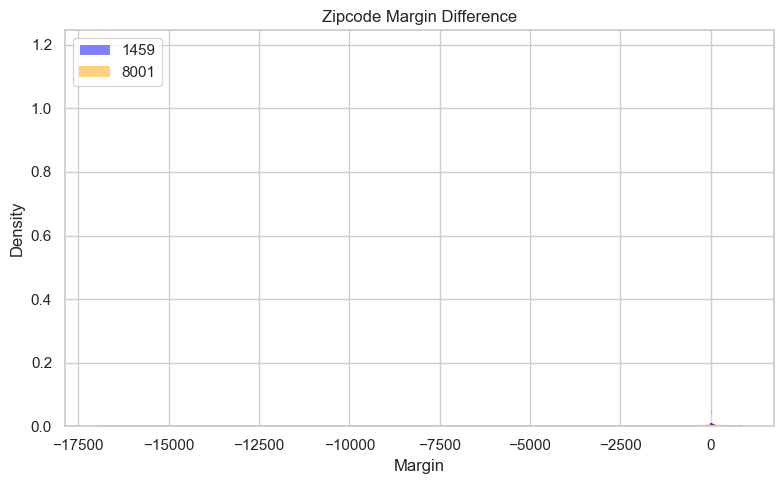

📊 Zipcode Margin Difference
 - 1459 Mean: 73.87
 - 8001 Mean: -4.69
 - p-value: 0.0087 ➜ Reject H₀
--------------------------------------------------


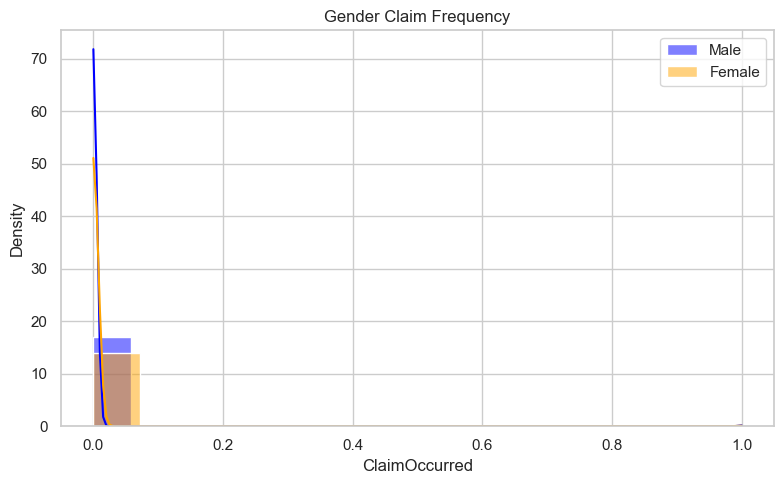

📊 Gender Claim Frequency
 - Male Mean: 0.00
 - Female Mean: 0.00
 - p-value: 0.8372 ➜ Fail to Reject H₀
--------------------------------------------------


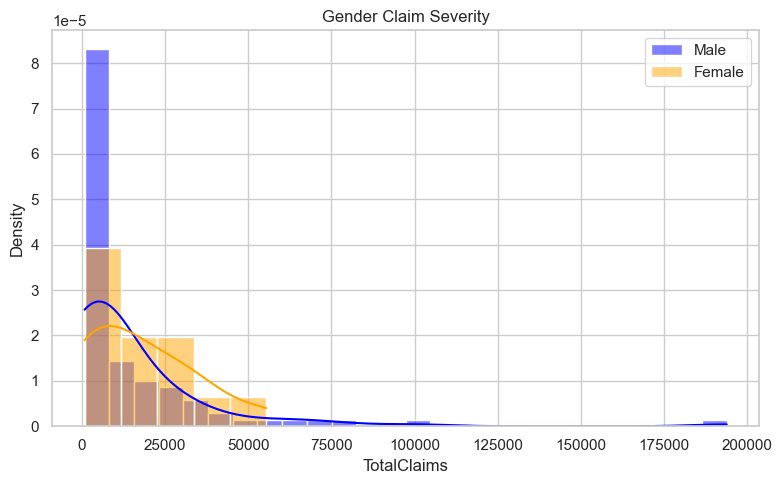

📊 Gender Claim Severity
 - Male Mean: 14858.55
 - Female Mean: 17874.72
 - p-value: 0.5680 ➜ Fail to Reject H₀
--------------------------------------------------

✅ All results saved in: outputs/task3_results
📄 Summary file: outputs/task3_results/summary.txt


In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Setup
output_dir = "outputs/task3_results"
os.makedirs(output_dir, exist_ok=True)
summary_path = os.path.join(output_dir, "summary.txt")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Load data
df = pd.read_csv("../data/MachineLearningRating_v3.txt", delimiter="|", low_memory=False)
df["ClaimOccurred"] = (df["TotalClaims"] > 0).astype(int)
df["Margin"] = df["TotalPremium"] - df["TotalClaims"]
df["PostalCode"] = df["PostalCode"].astype(str)
df = df.dropna(subset=["TotalClaims", "TotalPremium", "Margin"])
claims_df = df[df["ClaimOccurred"] == 1]

# Create new summary file
with open(summary_path, "w") as f:
    f.write("📊 Task 3 - Hypothesis Test Summary\n")
    f.write("=" * 50 + "\n\n")

# Test + Save Function
def save_and_display_test(name, group1_label, group2_label, group1_data, group2_data):
    name_sanitized = name.replace(" ", "_")
    result_png = os.path.join(output_dir, f"{name_sanitized}.png")

    # Run test
    stat, p = ttest_ind(group1_data, group2_data, equal_var=False, nan_policy='omit')
    mean1, mean2 = group1_data.mean(), group2_data.mean()
    conclusion = "Reject H₀" if p < 0.05 else "Fail to Reject H₀"

    # Save to summary file
    with open(summary_path, "a") as f:
        f.write(f"{name}\n")
        f.write(f" - {group1_label} Mean: {mean1:.2f}\n")
        f.write(f" - {group2_label} Mean: {mean2:.2f}\n")
        f.write(f" - p-value: {p:.4f} ➜ {conclusion}\n")
        f.write("-" * 50 + "\n")

    # Save and show plot
    plt.figure()
    sns.histplot(group1_data, kde=True, label=group1_label, color="blue", stat="density")
    sns.histplot(group2_data, kde=True, label=group2_label, color="orange", stat="density")
    plt.title(name)
    plt.legend()
    plt.tight_layout()
    plt.savefig(result_png)
    plt.show()

    # Also print to console
    print(f"📊 {name}")
    print(f" - {group1_label} Mean: {mean1:.2f}")
    print(f" - {group2_label} Mean: {mean2:.2f}")
    print(f" - p-value: {p:.4f} ➜ {conclusion}")
    print("-" * 50)

# Run all tests
save_and_display_test("Province Claim Frequency", "Gauteng", "Western Cape",
                      df[df["Province"] == "Gauteng"]["ClaimOccurred"],
                      df[df["Province"] == "Western Cape"]["ClaimOccurred"])
save_and_display_test("Province Claim Severity", "Gauteng", "Western Cape",
                      claims_df[claims_df["Province"] == "Gauteng"]["TotalClaims"],
                      claims_df[claims_df["Province"] == "Western Cape"]["TotalClaims"])

save_and_display_test("Zipcode Claim Frequency", "1459", "8001",
                      df[df["PostalCode"] == "1459"]["ClaimOccurred"],
                      df[df["PostalCode"] == "8001"]["ClaimOccurred"])
save_and_display_test("Zipcode Claim Severity", "1459", "8001",
                      claims_df[claims_df["PostalCode"] == "1459"]["TotalClaims"],
                      claims_df[claims_df["PostalCode"] == "8001"]["TotalClaims"])
save_and_display_test("Zipcode Margin Difference", "1459", "8001",
                      df[df["PostalCode"] == "1459"]["Margin"],
                      df[df["PostalCode"] == "8001"]["Margin"])

save_and_display_test("Gender Claim Frequency", "Male", "Female",
                      df[df["Gender"].str.lower() == "male"]["ClaimOccurred"],
                      df[df["Gender"].str.lower() == "female"]["ClaimOccurred"])
save_and_display_test("Gender Claim Severity", "Male", "Female",
                      claims_df[claims_df["Gender"].str.lower() == "male"]["TotalClaims"],
                      claims_df[claims_df["Gender"].str.lower() == "female"]["TotalClaims"])

print(f"\n✅ All results saved in: {output_dir}")
print(f"📄 Summary file: {summary_path}")
